In [1]:
import pandas as pd
import numpy as np

from glob import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline

import cv2

pd.pandas.set_option('display.max_columns', None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [4]:
data_folder = os.path.join('..', 'archive', 'nonsegmentedv2')
os.listdir(data_folder)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [5]:
data = []
for class_folder in os.listdir(data_folder):
    class_folder_dir = os.path.join(data_folder, class_folder)
    #print(glob(os.path.join(class_folder_dir, "*.png")))
    for img in glob(os.path.join(class_folder_dir, "*.png")):
        r = [img, class_folder]
        data.append(r)
#print(data)   
df = pd.DataFrame(data, columns=['image', 'target'])
df
    

,image,target
0,..\archive\nonsegmentedv2\Black-grass\1.png,Black-grass
1,..\archive\nonsegmentedv2\Black-grass\10.png,Black-grass
2,..\archive\nonsegmentedv2\Black-grass\100.png,Black-grass
3,..\archive\nonsegmentedv2\Black-grass\101.png,Black-grass
4,..\archive\nonsegmentedv2\Black-grass\102.png,Black-grass
...,...,...
5534,..\archive\nonsegmentedv2\Sugar beet\95.png,Sugar beet
5535,..\archive\nonsegmentedv2\Sugar beet\96.png,Sugar beet
5536,..\archive\nonsegmentedv2\Sugar beet\97.png,Sugar beet
5537,..\archive\nonsegmentedv2\Sugar beet\98.png,Sugar beet


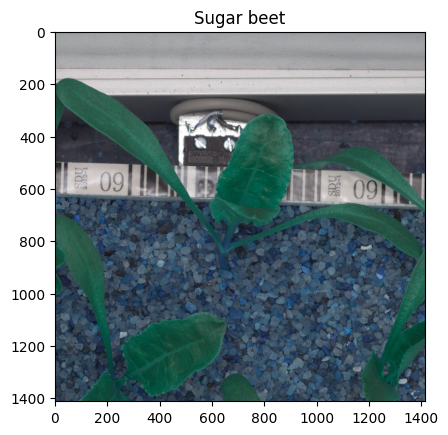

In [6]:
def plot_single_image(df, image_number):
    im = cv2.imread(df.loc[image_number, 'image'])
    plt.title(df.loc[image_number, 'target'])
    plt.imshow(im)
    
plot_single_image(df, 5538)

In [7]:
def plot_for_class(df, label):
    n_rows = 3
    n_cols = 3
    
    fig, axs = plt.subplots(nrows= n_rows, ncols= n_cols, figsize=(10,10))
    
    n = 0
    for i in range(n_rows):
        for j in range(n_cols):
            df_sel = df[df['target'] == label]
            df_sel.reset_index(drop=True, inplace=True)
            im = cv2.imread(df_sel.loc[n, 'image'])
            n += 1
            axs[i,j].imshow(im)

In [8]:
#plot_for_class(df, 'Charlock')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['target'], test_size=0.2, random_state=42, shuffle=True)

In [10]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

print(X_train.shape, X_test.shape)

X_train.head()

(4431,) (1108,)


0    ..\archive\nonsegmentedv2\Shepherds Purse\231.png
1            ..\archive\nonsegmentedv2\Fat Hen\398.png
2             ..\archive\nonsegmentedv2\Fat Hen\64.png
3    ..\archive\nonsegmentedv2\Small-flowered Crane...
4    ..\archive\nonsegmentedv2\Scentless Mayweed\31...
Name: image, dtype: object

In [11]:
data = []
y_train_val_cnt = y_train.value_counts()
y_test_val_cnt = y_test.value_counts()
df_val_cnt = df['target'].value_counts()

for target in df['target'].unique():
    r = [target, y_train_val_cnt[target]/df_val_cnt[target], y_test_val_cnt[target]/df_val_cnt[target]]    
    data.append(r)
    
print(pd.DataFrame(data, columns= ['target', 'train_ratio', 'test_ratio']))

                       target  train_ratio  test_ratio
0                 Black-grass     0.763754    0.236246
1                    Charlock     0.778761    0.221239
2                    Cleavers     0.805970    0.194030
3            Common Chickweed     0.802244    0.197756
4                Common wheat     0.822134    0.177866
5                     Fat Hen     0.791822    0.208178
6            Loose Silky-bent     0.833333    0.166667
7                       Maize     0.805447    0.194553
8           Scentless Mayweed     0.813839    0.186161
9             Shepherds Purse     0.777372    0.222628
10  Small-flowered Cranesbill     0.800347    0.199653
11                 Sugar beet     0.771058    0.228942


In [12]:
encoder = LabelEncoder()
encoder.fit(y_train)

LabelEncoder()

In [13]:
n_classes = df['target'].nunique()

def to_categorical(vec, num_classes):
    return np.eye(num_classes, dtype='uint8')[vec]
    
one_hot_y_train = to_categorical(encoder.transform(y_train), n_classes)
one_hot_y_test = to_categorical(encoder.transform(y_test), n_classes)

print(one_hot_y_train.shape)
print(one_hot_y_test.shape)

(4431, 12)
(1108, 12)


In [14]:
IMAGE_SiZE = 150

def im_resize(df, num):
    im = cv2.imread(df.loc[num])
    im = cv2.resize(im, [IMAGE_SiZE, IMAGE_SiZE])
    #plt.imshow(im)
    return im

In [15]:
resize_im = im_resize(X_train, 0)
resize_im.shape

(150, 150, 3)

In [16]:
def create_dataset(ar):
    
    data = [] #n1,n2, n3, n4
    for i, j in enumerate(ar):
        resize_im = im_resize(ar, i)
        data.append(resize_im)
    return np.array(data)
    #print(len(data))

In [17]:
X_train_data = create_dataset(X_train)
print(X_train_data.shape)

X_test_data = create_dataset(X_test)
print(X_test_data.shape)

(4431, 150, 150, 3)
(1108, 150, 150, 3)


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
X_train_tensor = (torch.tensor(X_train_data[:100], dtype= torch.float32)).permute(0,3,1,2)
print(X_train_tensor.shape)
X_test_tensor = (torch.tensor(X_test_data[:100], dtype= torch.float32)).permute(0,3,1,2)
print(X_test_tensor.shape)

#y_train_tensor = torch.tensor(one_hot_y_train, dtype= torch.long)
#y_test_tensor = torch.tensor(one_hot_y_test, dtype= torch.long)

y_train_tensor = torch.tensor(encoder.transform(y_train[:100]), dtype= torch.long)
y_test_tensor = torch.tensor(encoder.transform(y_test[:100]), dtype= torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size= 64, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size= 64, shuffle= True)

torch.Size([100, 3, 150, 150])
torch.Size([100, 3, 150, 150])


In [20]:
for img, label in train_loader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([64, 3, 150, 150])
torch.Size([64])


In [21]:
class CNN_Train(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.cnn_layer = nn.Sequential(
            nn.Conv2d(in_channels= 3, out_channels= 32, kernel_size= 3),
            nn.ReLU(),
            nn.Conv2d(in_channels= 32, out_channels= 32, kernel_size= 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 3, stride= 2),
            nn.Dropout(p= 0.3),
            
            nn.Conv2d(in_channels= 32, out_channels= 64, kernel_size= 3),
            nn.ReLU(),
            nn.Conv2d(in_channels= 64, out_channels= 64, kernel_size= 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 3, stride= 2),
            nn.Dropout(p= 0.3),      
            
            nn.Conv2d(in_channels= 64, out_channels= 128, kernel_size= 3),
            nn.ReLU(),
            nn.Conv2d(in_channels= 128, out_channels= 128, kernel_size= 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 3, stride= 2),
            nn.Dropout(p= 0.3),                 
            )
        
        with torch.no_grad():
            dummy_input = torch.randn(1, 3, 150, 150)
            dummy_output = self.cnn_layer(dummy_input)
            flattened_size = dummy_output.view(1, -1).size(1)

        self.fc1 = nn.Linear(in_features= flattened_size , out_features= 256)
        self.dropout = nn.Dropout(p= 0.3)
        self.fc2 = nn.Linear(in_features= 256 , out_features= 12)
        
        
    def forward(self, x):
        x = self.cnn_layer(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    

In [22]:
cnn_model = CNN_Train().to(device)

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

In [24]:
num_epochs = 10

for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for img, label in train_loader:
        img, label = img.to(device), label.to(device)
        
        out = cnn_model(img)
        loss = criterion(out, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        _, predicted = out.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")
        

Epoch 1/10, Loss: 36.5356, Accuracy: 10.00%
Epoch 2/10, Loss: 8.4130, Accuracy: 17.00%
Epoch 3/10, Loss: 2.3604, Accuracy: 15.00%
Epoch 4/10, Loss: 2.6615, Accuracy: 18.00%
Epoch 5/10, Loss: 2.4339, Accuracy: 19.00%
Epoch 6/10, Loss: 2.4756, Accuracy: 14.00%
Epoch 7/10, Loss: 2.4258, Accuracy: 17.00%
Epoch 8/10, Loss: 2.3878, Accuracy: 22.00%
Epoch 9/10, Loss: 2.3688, Accuracy: 20.00%
Epoch 10/10, Loss: 2.3590, Accuracy: 19.00%


In [25]:
cnn_model.eval()

total = 0.0
correct = 0.0

with torch.no_grad():
    for img, label in test_loader:
        img, label = img.to(device), label.to(device)
        
        out = cnn_model(img)
        _, predicted = out.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item()
    
print(f"Prediction Accuracy: {100*correct/total:.2f}%")

Prediction Accuracy: 20.00%


In [15]:
from glob import glob
import os

fnames = glob(os.path.join("model_package", "cnn_model", "trained_models", "*.pth"))
os.path.basename(fnames[0])

'cnn_model_output_epoch_10_v0.0.1.pth'

In [18]:
import re
match = re.match(r"^cnn_model_output_epoch_(\d+)_v[\d\.]+\.pth$", os.path.basename(fnames[0]))
match.group(1)

'10'